In [28]:
## This code was last modified on 27/11/2025

#The code generates the energy spectrum of the 0+1 supersymmetric quantum mechanics Hamiltonian for three supersymmetric potentials (HO, DW, and AHO).

In [29]:
# Essential information about the structure of the code for each block "approximately"
"""
Code structure
0) User choices block
1) Load all libraries modules
2) Custom functions needed
3) Calculate and digonalize the Hamiltonian for different truncation level (\Lambda)
4) Plot the energy spectrum
"""

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1468\2044705674.py:2: SyntaxWarning: invalid escape sequence '\L'
  """


'\nCode structure\n0) User choices block\n1) Load all libraries modules\n2) Custom functions needed\n3) Calculate and digonalize the Hamiltonian for different truncation level (\\Lambda)\n4) Plot the energy spectrum\n'

In [30]:
## Define user choice

# Parameters for the construction of the Hamiltonian
superpotential = "DW"                   # Chose a superpontentials "HO" Harmonic Oscillator; "DW" Double Well; "AHO" Anharmonic Oscillator                 
m = 1                                   # Chose the bosonic and fermionic mass
g = 1                                   # Chose the g interaction strenght present in AHO and DW
mu = 1.0                               # Chose the mu interaction strenght present in DW

# Enter the min and max g value needed for plotting the energies versus g
n_B_modes_min = 2                        # Chose the Smallest number of bosonic modes allowed (\Lambda)
n_B_modes_max = 32                         # Chose the Largest number of bosonic modes allowed (\Lambda)

H_full_or_block = "Full"                # Chose the "Full" for the full Hamiltonian or "Block" for the lower block

n_energy_states = 6                     # Chose the number of energy level to calculate                

In [31]:
## Section importing all needed libraries modules

#Packages for interacting with the operating system
import os

import sys

#Append the code's directory to the interpreter to search for files
sys.path.append('..')

#Importing the Hamiltonian from the file (Hamiltonian_SQM_0p1.py) inside the folder (hamiltonian_SQM)
from hamiltonian_SQM.Hamiltonian_SQM_0p1 import *

#Packages for numerical calculation
import numpy as np

import math

from scipy.sparse.linalg import eigs

#For eigenvalues and eigenvectors
from numpy import linalg 


#Packages for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FixedFormatter

from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerBase


#pakages needed 
from scipy.sparse import diags_array
from scipy.sparse.linalg import matrix_power

In [32]:
#Defining all needed functions

# this class is needed to control the position of the marker inside a custom legend entry. 
# Specifically we needed to create a custom legend handler.
class HandlerLineWithOffsetMarker(HandlerBase):
    def __init__(self, marker_x=0.5, line_fraction=0.6, **kwargs):
        super().__init__(**kwargs)
        self.marker_x = marker_x        # Marker position (0.0 to 1.0)
        self.line_fraction = line_fraction  # Line length as fraction of total width

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        line_width = width * self.line_fraction
        line_x_start = xdescent + (width - line_width) / 2
        line_x_end = line_x_start + line_width

        # Draw shorter line
        line = Line2D([line_x_start, line_x_end],
                      [ydescent + height / 2.0] * 2,
                      linestyle='-', linewidth=orig_handle.get_linewidth(),
                      color=orig_handle.get_color(), transform=trans)

        # Draw marker at correct offset along shortened line
        marker_x = line_x_start + self.marker_x * line_width
        marker = Line2D([marker_x],
                        [ydescent + height / 2.0],
                        linestyle='None', marker=orig_handle.get_marker(),
                        markersize=orig_handle.get_markersize(),
                        markerfacecolor=orig_handle.get_markerfacecolor(),
                        markeredgecolor=orig_handle.get_markeredgecolor(),
                        transform=trans)

        return [line, marker]
#==========================================================


In [33]:
#Defining the Hamiltonian name for plots and files
Hamiltonian_name = superpotential+"_"+H_full_or_block


# list of values for the bosonic modes
N_b_modes_values=list([2**i for i in range(int(math.log2(n_B_modes_min)), int(math.log2(n_B_modes_max))+1, 1)])
#print(N_b_modes_values)


# Create empty arrays for storing the energy spectrum of each Hamiltonian with a different value of bosonic modes
for i in N_b_modes_values:
    globals()[f"energy_levels_nbm_{i}"] = [] 

selected_eigenvalues=[]

for N_b_m in N_b_modes_values:
    
    # Calculate the Hamiltonian 
    hamiltonian = Hamiltonian_SQM_0p1(superpotential, n_bosonic_modes = N_b_m, m = m, g = g, mu = mu)

    #Dictionary to handle the selection of full or block Hamiltonian and generation of the dense array
    H_full_or_block_dict = {
        "Full": hamiltonian.toarray(),
        "Block": hamiltonian.toarray()[N_b_m:2*N_b_m,N_b_m:2*N_b_m]
        }

    hamiltonian_array = H_full_or_block_dict.get(H_full_or_block, "Choice not present! type " + str([i for i in H_full_or_block_dict.keys()]))
    

    # Calculate the eigenvalue and eigenvetor
    eigenvalues, eigenVector = np.linalg.eig(hamiltonian_array)
    
    #Sort the eingenvalues 
    sorted_eigenvalues=np.sort(eigenvalues).real
    #print(sorted_eigenvalues)
    
    globals()[f"energy_levels_nbm_{N_b_m}"].append(sorted_eigenvalues[:n_energy_states])

#eigenvalue_array = np.vstack(selected_eigenvalues)
#print(eigenvalue_array)

#===================================================================================================================================================================


In [34]:
# Sanity Check: Verify that all data is stored correctly
for i in N_b_modes_values:
    print("Lambda", i, globals()[f"energy_levels_nbm_{i}"])

Lambda 2 [array([0.35723305, 0.77144661, 1.47855339, 3.89276695])]
Lambda 4 [array([0.90655987, 0.95063353, 1.69566635, 1.83552815, 3.68722443,
       3.88130778])]
Lambda 8 [array([0.88458044, 0.88772546, 2.69387284, 2.74082491, 4.35546524,
       4.8486501 ])]
Lambda 16 [array([0.89159936, 0.89164095, 2.73412225, 2.73412782, 4.84321601,
       4.84747669])]
Lambda 32 [array([0.89163237, 0.89163238, 2.7340106 , 2.7340108 , 4.84484636,
       4.84484775])]


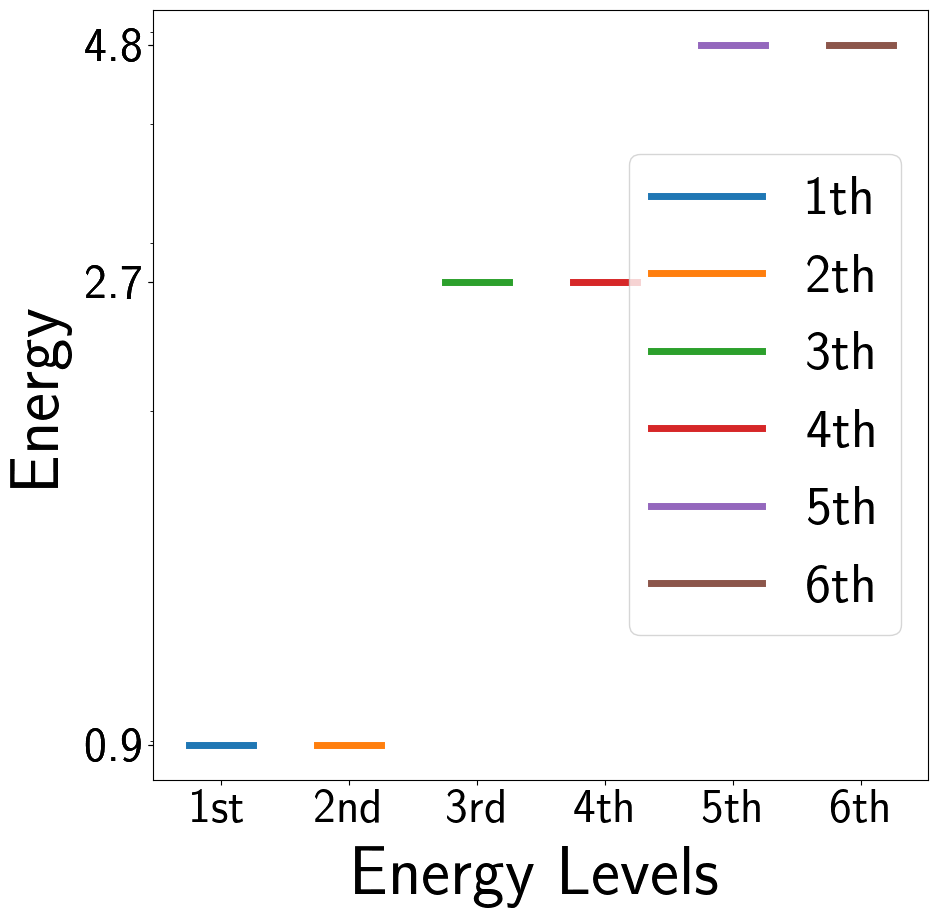

In [ ]:
#===================================================================================================================================================================
#Plot section of the energy spectrum for a fixed value of truncation level \Lambda (default \lambda 16 )

# Enable LaTeX-style formatting globally
plt.rcParams['text.usetex'] = True


#Selection of standard colors used in the following plots, please use the electromagnetic enery spectrum comvention
colors_list = ["forestgreen", "skyblue", "indigo", 'orange', "violet", "cyan", "darkgray", "dodgerblue","sienna", "lawngreen", "magenta", "teal", "gold" ]


# List of energy levels (in eV or other units)
energy_levels = energy_levels_nbm_16[0]


# Define spacing between energy levels along x-axis
spacing = 2
x_positions = [i * spacing for i in range(n_energy_states)]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))


# Plot each energy level as a horizontal line
for i, (energy, x_pos) in enumerate(zip(energy_levels, x_positions)):
    ax.plot([x_pos, x_pos + 1], [energy, energy], label=f"{i+1}th", linewidth=5 )


#Choose log scale for the y-axis if the ground-state energy is larger than zero otherwise symlog (logarithmic scaling with negative values)
if all( i > 0 for i in energy_levels):
    ax.set_yscale('log')
else:
    ax.set_yscale('symlog')

#Plot title and axis labels
fontsize = 35


# Custom x-tick positions (middle of each line) and labels
xticks = [x + 0.5 for x in x_positions]
xtick_labels = [f"{i+1}st" if i == 0 else f"{i+1}nd" if i == 1 else f"{i+1}rd" if i == 2 else f"{i+1}th" for i in range(n_energy_states)]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)


# Custom y-tick positions (middle of each line) and labels
yticks = energy_levels
ytick_labels=energy_levels
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{e:.1f}" for e in energy_levels], fontsize=14)



# Set custom y-ticks and remove default log formatting
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=None))  # disable minor ticks if needed
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{e:.1f}" for e in energy_levels], fontsize=14)

# Prevent scientific notation altogether
ax.yaxis.set_minor_formatter(FixedFormatter([]))  # empty minor ticks
ax.yaxis.set_major_formatter(FixedFormatter([f"{e:.1f}" for e in energy_levels]))



# Adding labels and title
ax.set_xlabel(r"Energy Levels", fontsize = 50, labelpad=10)
ax.set_ylabel(r"Energy",fontsize = 50, labelpad=10)
plt.xticks(fontsize = fontsize) 
plt.yticks(fontsize = fontsize) 

plt.legend(fontsize = 40, loc='center right')


# Optional: remove legend since x-tick labels cover that info
ax.legend()

plt.legend(fontsize = 40, loc='center right')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1468\3296797739.py:140: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([-1e-1, 1e1])


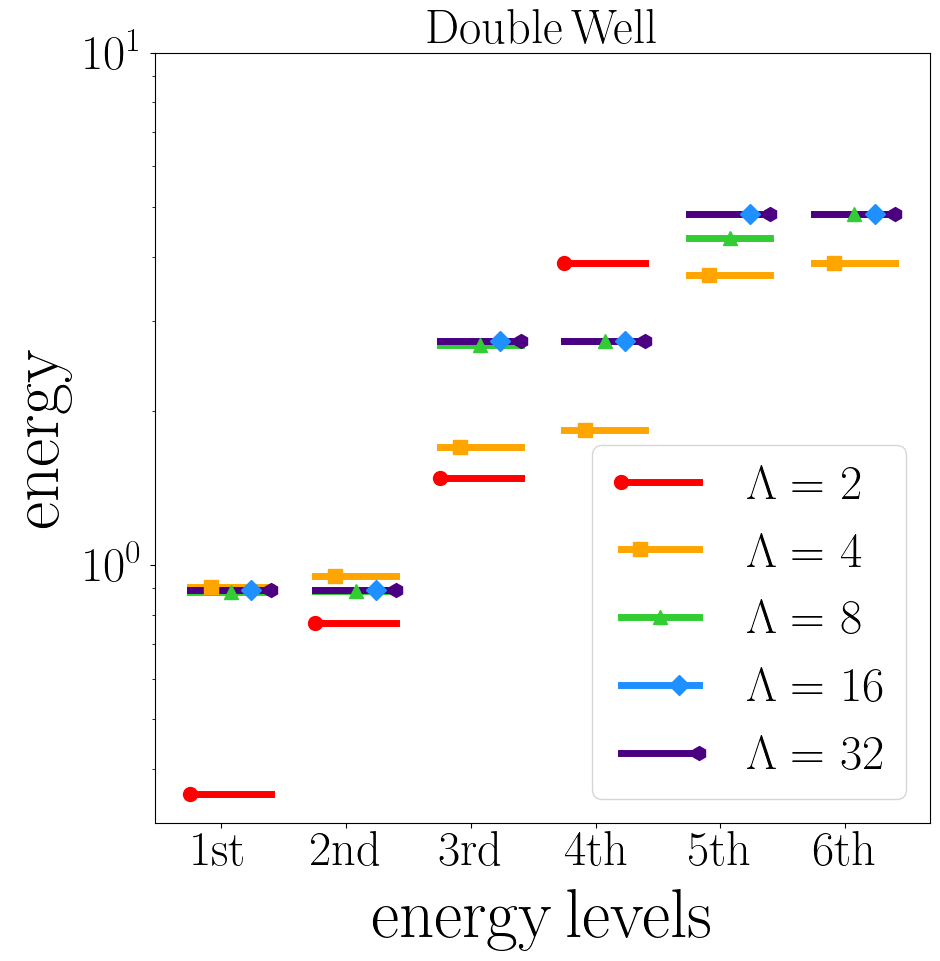

In [37]:

#===================================================================================================================================================================
#Plot section all values of Lambda toghether

# Enable LaTeX-style formatting globally
plt.rcParams['text.usetex'] = True


#Selection of standard colors used in the following plots, please use the electromagnetic enery spectrum comvention
colors_list = ["forestgreen", "skyblue", "indigo", 'orange', "violet", "cyan", "darkgray", "dodgerblue","sienna", "lawngreen", "magenta", "teal", "gold" ]

em_spectrum_colors_list = [
    '#8B00FF',  # Violet
    '#4B0082',  # Indigo
    '#0000FF',  # Blue
    '#00BFFF',  # Sky Blue
    '#00FFFF',  # Cyan
    '#00FF00',  # Green
    '#ADFF2F',  # Yellow-Green
    '#FFFF00',  # Yellow
    '#FF7F00',  # Orange
    '#FF0000'   # Red
]

em_spectrum_colors_5 = [
    '#FF0000',  # Red
    '#FFA500',  # Orange
    '#32CD32',  # Green
    '#1E90FF',  # Blue
    '#4B0082',  # Indigo
]




#Selection of standard marker symbols
markers_list = ['o',  # Circle
           's',  # Square
           '^',  # Triangle Up
           'D',  # Diamond
           'h', # Hexagon
           '*',  # Star
            'v',  # Triangle Down
           'x',  # X
           '+',  # Plus
           'p'  # Pentagon
           ]  


# List of energy levels (in eV or other units)
energy_levels = globals()[f"energy_levels_nbm_{2}"][0]


# Define spacing between energy levels along x-axis
spacing = 2
x_positions = [i * spacing for i in range(n_energy_states)]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))


# Plot each energy level as a horizontal line
for j in N_b_modes_values:
    energies = globals()[f"energy_levels_nbm_{j}"][0]

    for i, (energy, x_pos) in enumerate(zip(energies, x_positions)):
            label = r"""$\Lambda = $""" + rf" ${j}$" if i == 0 else None            
            # Plot the energy level as a horizontal line

            ax.plot([x_pos, x_pos + 1.3], [energy, energy], label=label, linewidth=5, color=em_spectrum_colors_5[int(math.log2(j)-1)])
            # Add a marker 
            ax.plot(x_pos+ int(math.log2(j)-1)*1.3/(len(N_b_modes_values)-1) , energy, marker=markers_list[int(math.log2(j)-1)], color=em_spectrum_colors_5[int(math.log2(j)-1)], markersize=10, zorder=5)  


#Choose log scale for the y-axis if the ground-state energy is larger than zero otherwise symlog (logarithmic scaling with negative values)
if all( i > 0 for i in energy_levels):
    ax.set_yscale('log')
else:
    ax.set_yscale('symlog')

#Plot title and axis labels
fontsize = 35


# Define a standard title info for all plots
plot_title_dict = {
        "HO": str(r"""$ \rm Harmonic \, Oscillator $"""),
        "DW": str(r"""$ \rm Double \, Well $""") ,
        "AHO": str(r"""$ \rm Anharmonic \, Oscillator $""")
        }

plot_info_title = plot_title_dict.get(superpotential, "Choice not present! type " + str([i for i in plot_title_dict.keys()]))

plt.title(plot_info_title, fontsize = fontsize)



# Custom x-tick positions (middle of each line) and labels
xticks = [x + 0.5 for x in x_positions]
xtick_labels = [rf"${i+1} \rm st$" if i == 0 else rf"""${i+1} \rm nd$""" if i == 1 else rf"""${i+1} \rm rd$""" if i == 2 else rf"""${i+1} \rm th$""" for i in range(n_energy_states)]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Adding labels and title
ax.set_xlabel(r"""$ \rm energy \, levels$""", fontsize = 50, labelpad=10)
ax.set_ylabel(r"""$ \rm energy$""",fontsize = 50, labelpad=10)
plt.xticks(fontsize = fontsize) 
plt.yticks(fontsize = fontsize) 



# Lines for a custom leggend
#========================================
custom_legend_handles = []
custom_legend_handlers = {}
custom_legend_labels = []

for j in N_b_modes_values:
    idx = int(math.log2(j) - 1)
    color = em_spectrum_colors_5[idx]
    marker = markers_list[idx]
    label = r"""$ \Lambda = $""" + rf' ${j}$'
    # Compute where you want the marker on the legend line (0 = left, 1 = right)
    marker_pos = int(math.log2(j)-1)*1/(len(N_b_modes_values)-1)
 

    handle = Line2D([0, 1], [0, 0], color=color, linewidth=5,
                    marker=marker, markersize=10,
                    markerfacecolor=color)
    
    custom_legend_handles.append(handle)
    custom_legend_labels.append(label)
    custom_legend_handlers[handle] = HandlerLineWithOffsetMarker(marker_x=marker_pos, line_fraction=0.8)


ax.legend(custom_legend_handles, custom_legend_labels, handler_map=custom_legend_handlers, fontsize = 35, loc='best')   #'upper left' 'lower right'

ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=[1,2,3,4,5, 6,7, 8 , 9], numticks=10))

ax.set_ylim([-1e-1, 1e1])

plt.savefig(superpotential+f"_minBm_{n_B_modes_min}"+f"__minBm_{n_B_modes_max}"+'_.pdf', bbox_inches='tight', format='pdf', dpi=600)

plt.show()